# New Section

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Alpha-Delta dataset.csv to Alpha-Delta dataset.csv


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

df= pd.read_csv("Alpha-Delta dataset.csv",usecols=['infection_Delta_Iran'])


In [ ]:
df1= pd.read_csv("Alpha-Delta dataset.csv",usecols=['infection_Delta_Iran'])
window=7
rolling = df1.rolling(window)
df1 = rolling.mean()
for i in range(window-1):
    df1.iloc[i]=df.iloc[i]
df = df1
df = df.dropna()

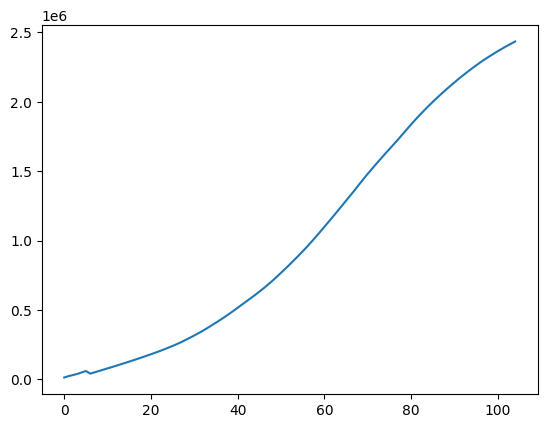

In [ ]:
plt.plot(df)

In [ ]:
#determining parameters
#d
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['infection_Delta_Iran'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.053125
p-value: 0.733399


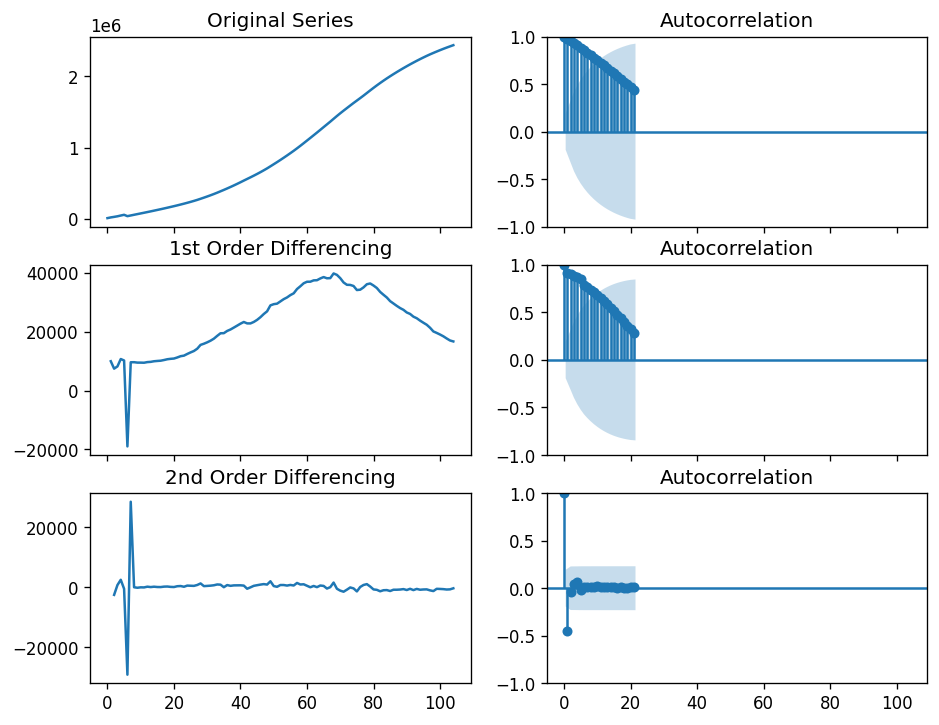

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['infection_Delta_Iran']); axes[0, 0].set_title('Original Series')
plot_acf(df['infection_Delta_Iran'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['infection_Delta_Iran'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['infection_Delta_Iran'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['infection_Delta_Iran'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['infection_Delta_Iran'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


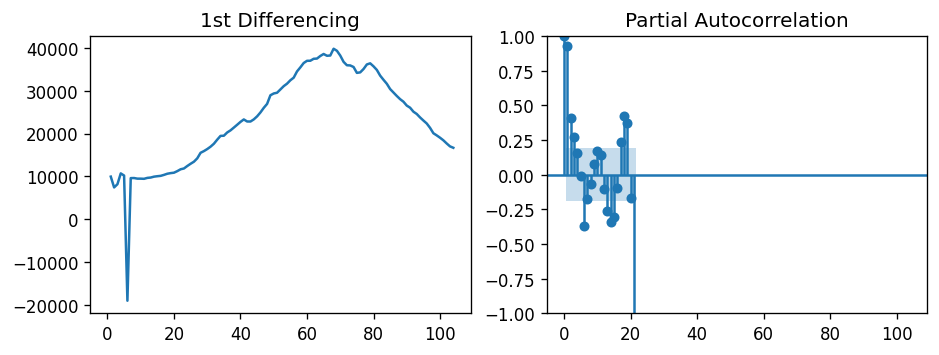

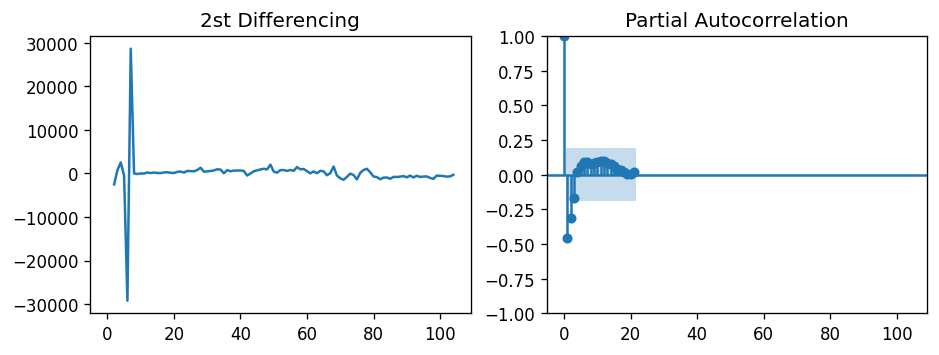

In [ ]:
#determining parameters
#p
# PACF plot of 1st or 2st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['infection_Delta_Iran'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['infection_Delta_Iran'].diff().dropna(), ax=axes[1])


fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['infection_Delta_Iran'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['infection_Delta_Iran'].diff().diff().dropna(), ax=axes[1])
plt.show()


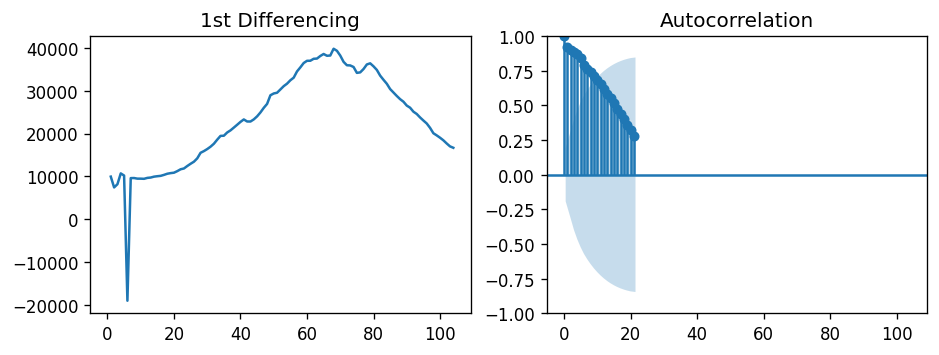

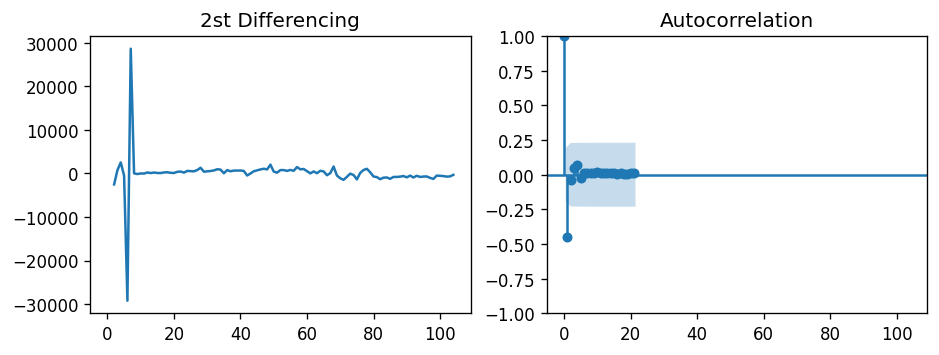

In [ ]:
#determining parameters
#q
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['infection_Delta_Iran'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['infection_Delta_Iran'].diff().dropna(), ax=axes[1])

# Import data
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['infection_Delta_Iran'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['infection_Delta_Iran'].diff().diff().dropna(), ax=axes[1])
plt.show()




                                SARIMAX Results                                 
Dep. Variable:     infection_Delta_Iran   No. Observations:                   98
Model:                   ARIMA(2, 2, 3)   Log Likelihood                -920.391
Date:                  Fri, 14 Apr 2023   AIC                           1852.782
Time:                          12:12:09   BIC                           1868.168
Sample:                               0   HQIC                          1859.001
                                   - 98                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0008      0.062      0.013      0.989      -0.120       0.122
ar.L2          0.9992      0.062     16.215      0.000       0.878       1.120
ma.L1         -0.7853      0.200    

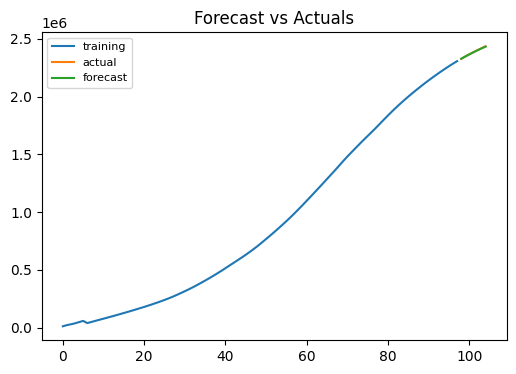

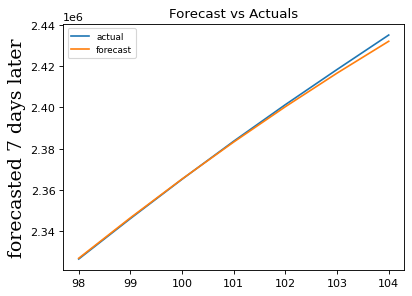

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=7
# Create Training and Test
train = df['infection_Delta_Iran'][:len(df)-n_future]
test = df['infection_Delta_Iran'][len(df)-n_future:]

model = ARIMA(train, order=(2, 2, 3))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
font1 = {'family':'Serif','color':'black','size':17}
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Plot
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 7 days later", fontdict = font1)
plt.show()


In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.000416381875127729,
 'me': -759.0184707344908,
 'mae': 1004.0147785183841,
 'mpe': -0.00031169670813541763,
 'rmse': 1397.0941788320763}

                                SARIMAX Results                                 
Dep. Variable:     infection_Delta_Iran   No. Observations:                   91
Model:                   ARIMA(1, 2, 3)   Log Likelihood                -856.559
Date:                  Fri, 14 Apr 2023   AIC                           1723.119
Time:                          12:14:03   BIC                           1735.562
Sample:                               0   HQIC                          1728.134
                                   - 91                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001    991.235      0.000       0.998       1.002
ma.L1         -1.7251      0.046    -37.206      0.000      -1.816      -1.634
ma.L2          0.6916      0.077    

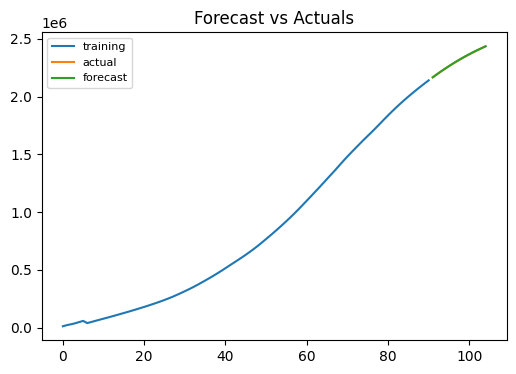

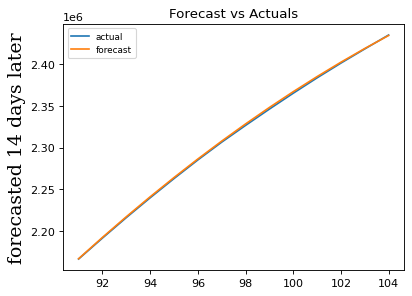

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=14
# Create Training and Test
train = df['infection_Delta_Iran'][:len(df)-n_future]
test = df['infection_Delta_Iran'][len(df)-n_future:]

model = ARIMA(train, order=(1, 2, 3))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# Plot
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 14 days later", fontdict = font1)
plt.show()


In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.0004998892544890046,
 'me': 1076.372114023992,
 'mae': 1157.562369552308,
 'mpe': 0.0004665472137535512,
 'rmse': 1251.7278324526446}

                                SARIMAX Results                                 
Dep. Variable:     infection_Delta_Iran   No. Observations:                   84
Model:                   ARIMA(1, 2, 3)   Log Likelihood                -795.570
Date:                  Fri, 14 Apr 2023   AIC                           1601.140
Time:                          12:16:25   BIC                           1613.173
Sample:                               0   HQIC                          1605.971
                                   - 84                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001    764.096      0.000       0.997       1.003
ma.L1         -1.7437      0.053    -32.978      0.000      -1.847      -1.640
ma.L2          0.5735      0.087    

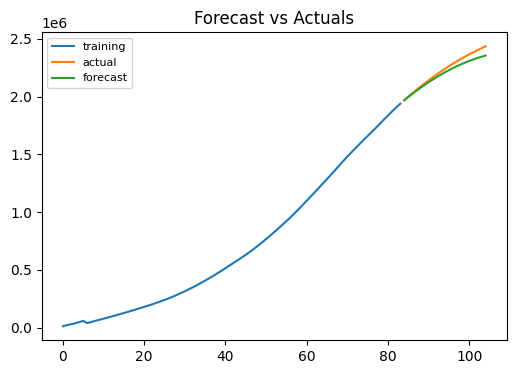

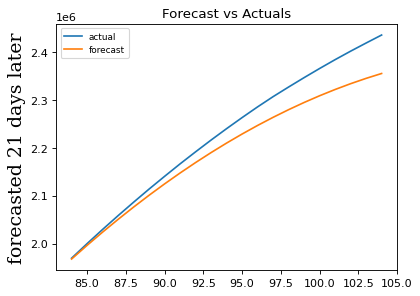

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=21
# Create Training and Test
train = df['infection_Delta_Iran'][:len(df)-n_future]
test = df['infection_Delta_Iran'][len(df)-n_future:]

model = ARIMA(train, order=(1, 2, 3))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# Plot
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 21 days later", fontdict = font1)
plt.show()



In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.01461303823461249,
 'me': -33877.43515320143,
 'mae': 33877.43515320143,
 'mpe': -0.01461303823461249,
 'rmse': 41477.5515867284}

In [ ]:
#########

In [ ]:
##deaths

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

df= pd.read_csv("Alpha-Delta dataset.csv",usecols=['death_Delta_Iran'])


In [ ]:
df1= pd.read_csv("Alpha-Delta dataset.csv",usecols=['death_Delta_Iran'])
window=7
rolling = df1.rolling(window)
df1 = rolling.mean()
for i in range(window-1):
    df1.iloc[i]=df.iloc[i]
df = df1
df = df.dropna()

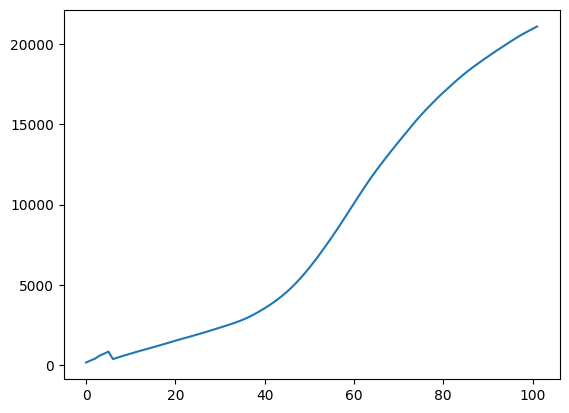

In [ ]:
plt.plot(df)

In [ ]:
#determining parameters
#d
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['death_Delta_Iran'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.624722
p-value: 0.087995


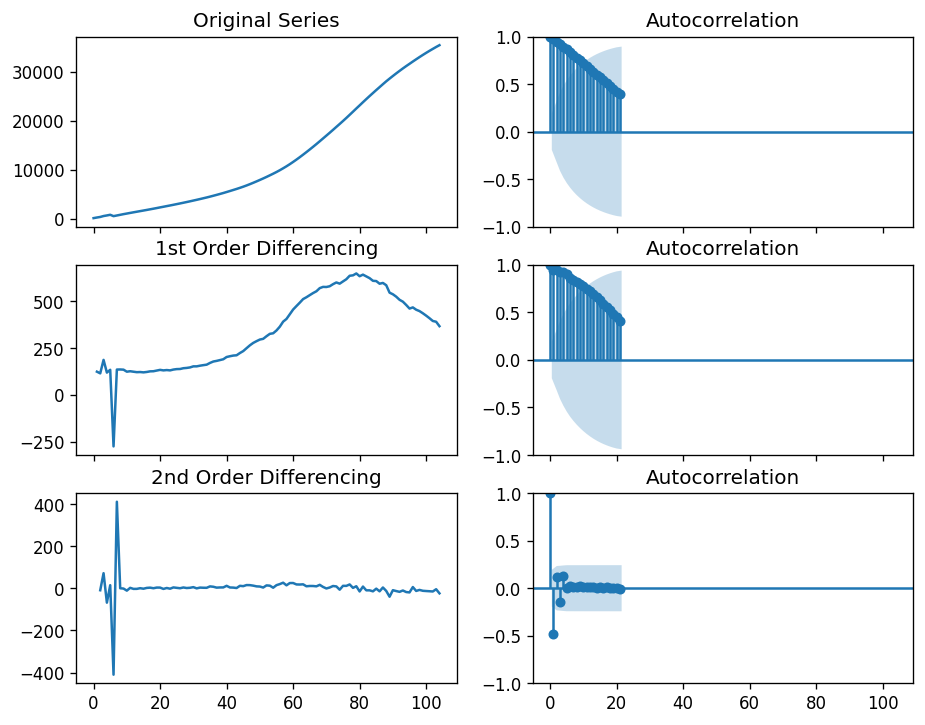

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['death_Delta_Iran']); axes[0, 0].set_title('Original Series')
plot_acf(df['death_Delta_Iran'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['death_Delta_Iran'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['death_Delta_Iran'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['death_Delta_Iran'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['death_Delta_Iran'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


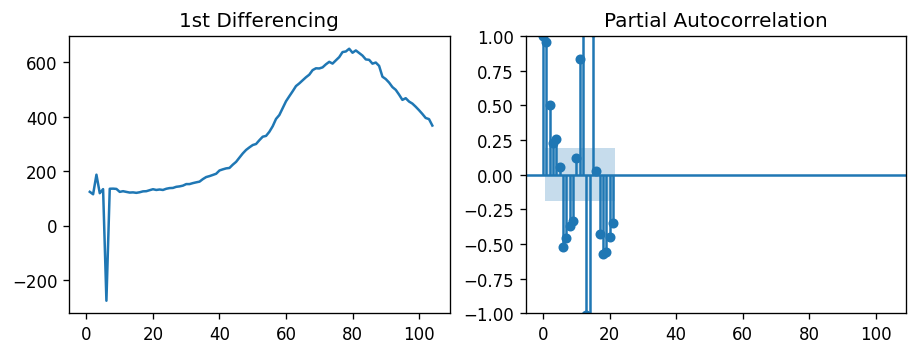

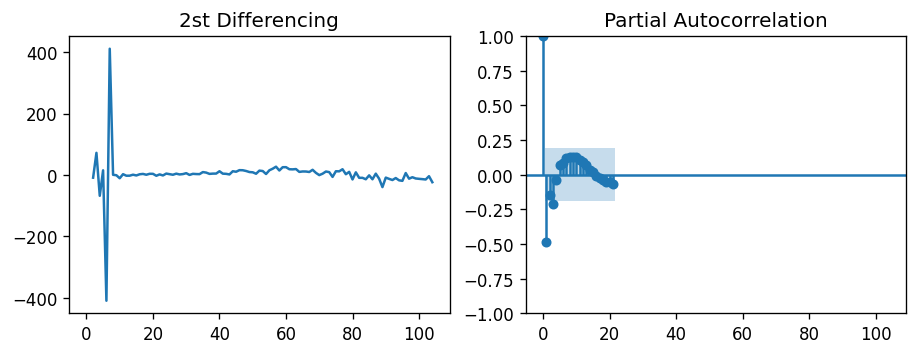

In [ ]:
#determining parameters
#p
# PACF plot of 1st or 2st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['death_Delta_Iran'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['death_Delta_Iran'].diff().dropna(), ax=axes[1])


fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['death_Delta_Iran'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['death_Delta_Iran'].diff().diff().dropna(), ax=axes[1])
plt.show()

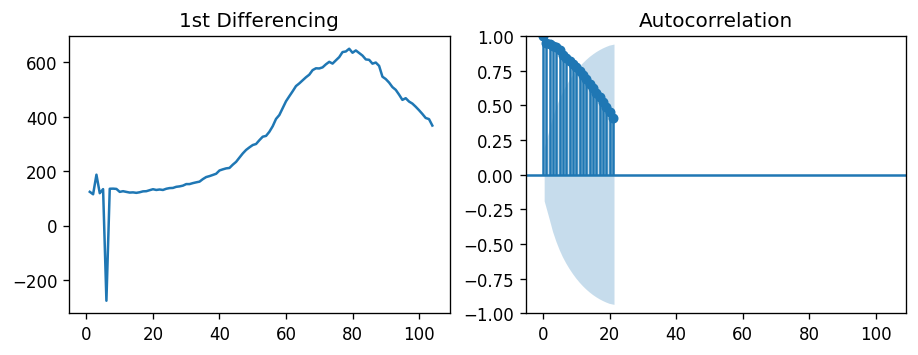

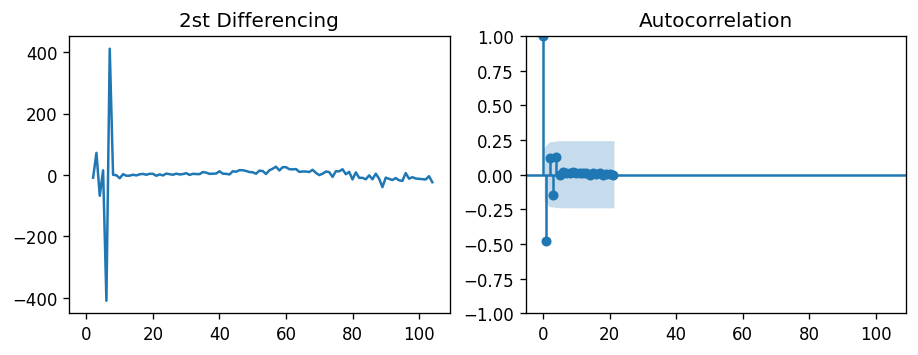

In [ ]:
#determining parameters
#q
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['death_Delta_Iran'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['death_Delta_Iran'].diff().dropna(), ax=axes[1])

# Import data
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['death_Delta_Iran'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df['death_Delta_Iran'].diff().diff().dropna(), ax=axes[1])
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       death_Delta_Iran   No. Observations:                   98
Model:                 ARIMA(3, 2, 2)   Log Likelihood                -509.717
Date:                Fri, 14 Apr 2023   AIC                           1031.434
Time:                        12:24:36   BIC                           1046.820
Sample:                             0   HQIC                          1037.653
                                 - 98                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1698      0.131      8.905      0.000       0.912       1.427
ar.L2         -0.0171      0.064     -0.266      0.790      -0.143       0.109
ar.L3         -0.1727      0.116     -1.492      0.1

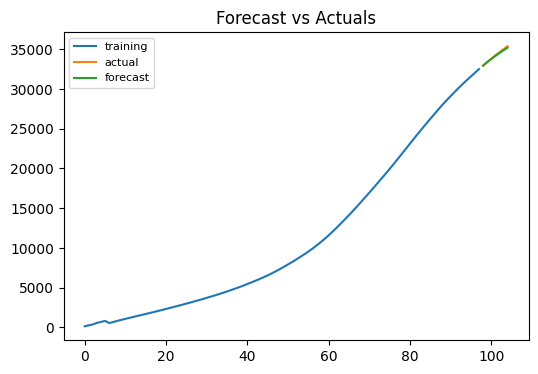

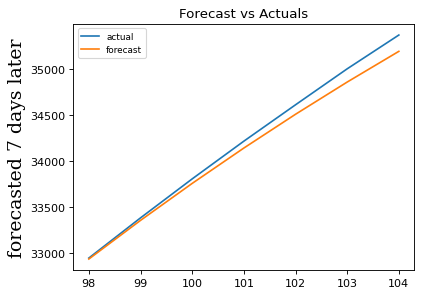

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=7
# Create Training and Test
train = df['death_Delta_Iran'][:len(df)-n_future]
test = df['death_Delta_Iran'][len(df)-n_future:]

model = ARIMA(train, order=(3, 2, 2))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Plot
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 7 days later", fontdict = font1)
plt.show()


In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.002410192764592247,
 'me': -83.68001577411009,
 'mae': 83.68001577411009,
 'mpe': -0.002410192764592247,
 'rmse': 101.13826213044307}

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:       death_Delta_Iran   No. Observations:                   91
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -482.890
Date:                Fri, 14 Apr 2023   AIC                            979.780
Time:                        12:27:58   BIC                            997.278
Sample:                             0   HQIC                           986.836
                                 - 91                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0107      0.217      4.661      0.000       0.586       1.436
ar.L2          0.9321      0.423      2.204      0.028       0.103       1.761
ar.L3         -0.9451      0.210     -4.493      0.0

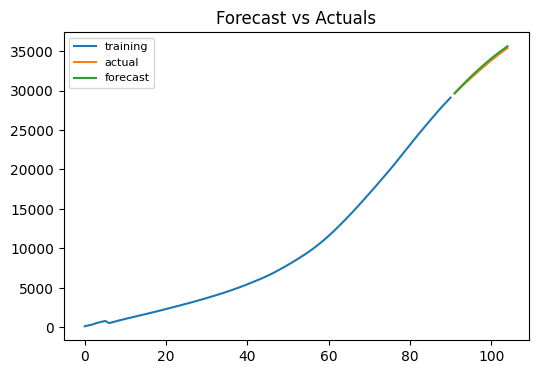

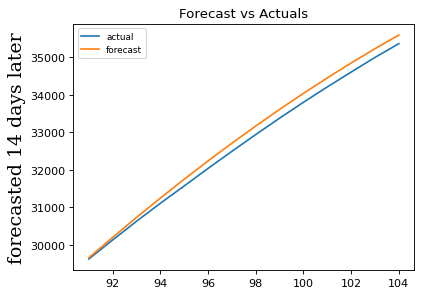

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=14
# Create Training and Test
train = df['death_Delta_Iran'][:len(df)-n_future]
test = df['death_Delta_Iran'][len(df)-n_future:]

model = ARIMA(train, order=(3, 1, 3))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Plot
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 14 days later", fontdict = font1)
plt.show()


In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.005570895688996427,
 'me': 184.71355433347475,
 'mae': 184.71355433347475,
 'mpe': 0.005570895688996427,
 'rmse': 196.7489788513017}

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:       death_Delta_Iran   No. Observations:                   84
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -453.298
Date:                Fri, 14 Apr 2023   AIC                            914.595
Time:                        12:36:12   BIC                            924.271
Sample:                             0   HQIC                           918.482
                                 - 84                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8588      0.090      9.575      0.000       0.683       1.035
ar.L2          0.1397      0.089      1.566      0.117      -0.035       0.315
ma.L1         -0.4839      0.096     -5.038      0.0

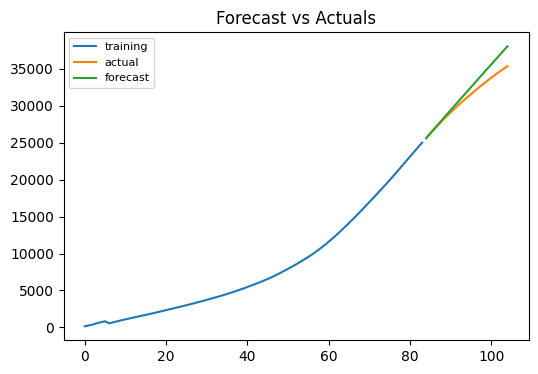

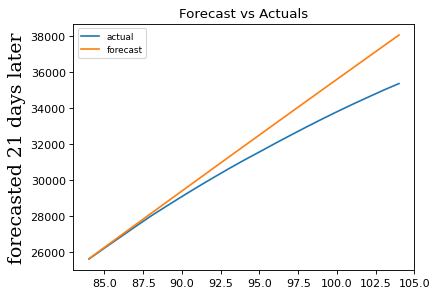

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
n_future=21
# Create Training and Test
train = df['death_Delta_Iran'][:len(df)-n_future]
test = df['death_Delta_Iran'][len(df)-n_future:]

model = ARIMA(train, order=(2, 1, 1))
fitted = model.fit()
# summary of fit model
print(fitted.summary())
# Forecast
fc= fitted.forecast(n_future, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# Plot
plt.figure(figsize=(6,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Plot
plt.figure(figsize=(5.5, 4), dpi=80)
plt.plot(test, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel("forecasted 21 days later", fontdict = font1)
plt.show()


In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mape': 0.029820281368221648,
 'me': 989.395380937038,
 'mae': 989.395380937038,
 'mpe': 0.029820281368221648,
 'rmse': 1299.5528211334026}